In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('train.csv')
df.head()
test = pd.read_csv('test.csv')

In [102]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [103]:
df.shape

(19237, 18)

In [3]:
df.index=df['ID']
df.drop(columns='ID',inplace=True)
df.shape

(19237, 17)

In [4]:
df.drop_duplicates(inplace=True)
df.shape

(15725, 17)

In [106]:
df.describe(include='all')

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,1.572500e+04,15725,15725,15725,15725.000000,15725,15725,15725,15725,15725,15725.000000,15725,15725,15725,15725,15725,15725.000000
unique,NaN,559,65,1590,NaN,11,2,7,107,7687,NaN,4,3,3,2,16,NaN
top,NaN,-,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,04-May,Left wheel,Black,NaN
freq,NaN,5684,3050,946,NaN,7010,10558,8824,3314,608,NaN,10088,10990,14855,14293,3835,NaN
mean,2.027944e+04,NaN,NaN,NaN,2010.518919,NaN,NaN,NaN,NaN,NaN,4.483561,NaN,NaN,NaN,NaN,NaN,6.543339
std,2.106390e+05,NaN,NaN,NaN,6.012122,NaN,NaN,NaN,NaN,NaN,1.134466,NaN,NaN,NaN,NaN,NaN,4.067728
min,1.000000e+00,NaN,NaN,NaN,1939.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,7.527000e+03,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,1.416600e+04,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,6.000000
75%,2.336400e+04,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,12.000000


In [23]:
df.isna().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [24]:
df.dtypes

Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [5]:
df['Levy'] = df['Levy'].replace('-',np.nan)
df['Levy'] = df['Levy'].astype('float16')

##### Engine Volume and Turbo

In [6]:
def Engvol(df):                                                          # Cleaning EngVol and creating a new Variable "Turbo"
    Turbo=[]
    for i, index in enumerate(df['Engine volume'].index):
        if len(df['Engine volume'][index])>4:
            Turbo.append(1)
            df['Engine volume'][index] = df['Engine volume'][index][:3]
        else:
            Turbo.append(0)
            df['Engine volume'][index] = df['Engine volume'][index][:3]
    df['Turbo']= Turbo
    df['Engine volume'] = df['Engine volume'].astype('float16')

In [7]:
Engvol(df)
df.tail()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
ID,,,,,,,,,,,,,,,,,,
45760891,470,645.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.799805,307325 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12,0
45798355,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.000000,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.400391,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.000000,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
45813273,470,753.0,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.400391,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12,0


##### Mileage

In [8]:
df['Mileage'] = [i[0:-3] for i in df['Mileage']]
df['Mileage'] = df['Mileage'].astype('int64')
df.tail()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
ID,,,,,,,,,,,,,,,,,,
45760891,470,645.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.799805,307325,4.0,Automatic,Front,04-May,Left wheel,Silver,12,0
45798355,8467,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.000000,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,1
45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.400391,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,0
45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.000000,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4,0
45813273,470,753.0,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.400391,186923,4.0,Automatic,Front,04-May,Left wheel,White,12,0


<AxesSubplot:xlabel='Mileage', ylabel='Count'>

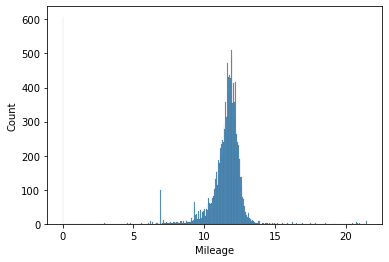

In [26]:
sns.histplot(np.log1p(df['Mileage']),bins=500)

In [13]:
df['Mileage'].describe()

count    1.572500e+04
mean     1.836421e+06
std      5.353248e+07
min      0.000000e+00
25%      6.657500e+04
50%      1.210000e+05
75%      1.800000e+05
max      2.147484e+09
Name: Mileage, dtype: float64

##### Levy

<AxesSubplot:xlabel='Levy', ylabel='Count'>

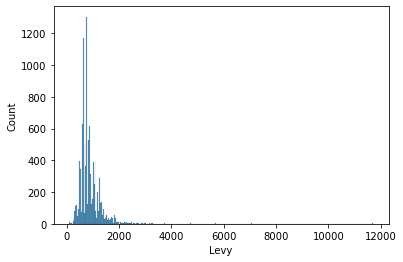

In [12]:
sns.histplot(df['Levy'])

In [9]:
#replacing NaN values in Levy by the median of the column since the distribution is skewed
df['Levy'] = df['Levy'].replace(np.nan,df['Levy'].median())
levy_median = df['Levy'].median()
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
ID,,,,,,,,,,,,,,,,,,
45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.500000,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.000000,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
45774419,8467,779.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.299805,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.500000,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.299805,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0


###### Price

In [112]:
df['Price'].value_counts().sort_index(ascending=False).head(10)

26307500    1
872946      1
627220      1
308906      1
297930      2
288521      1
260296      1
254024      1
250574      1
228935      1
Name: Price, dtype: int64

In [10]:
df = df[df['Price']<500000]

<AxesSubplot:xlabel='Price', ylabel='Count'>

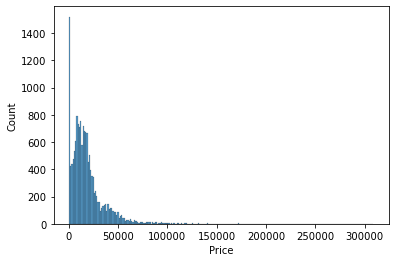

In [114]:
sns.histplot(df['Price'])

In [11]:
df = df[df['Price']<70000]

<AxesSubplot:xlabel='Price', ylabel='Count'>

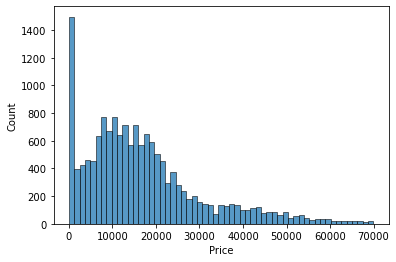

In [116]:
sns.histplot(df['Price'])

In [117]:
df.shape

(15421, 18)

<AxesSubplot:xlabel='count', ylabel='Manufacturer'>

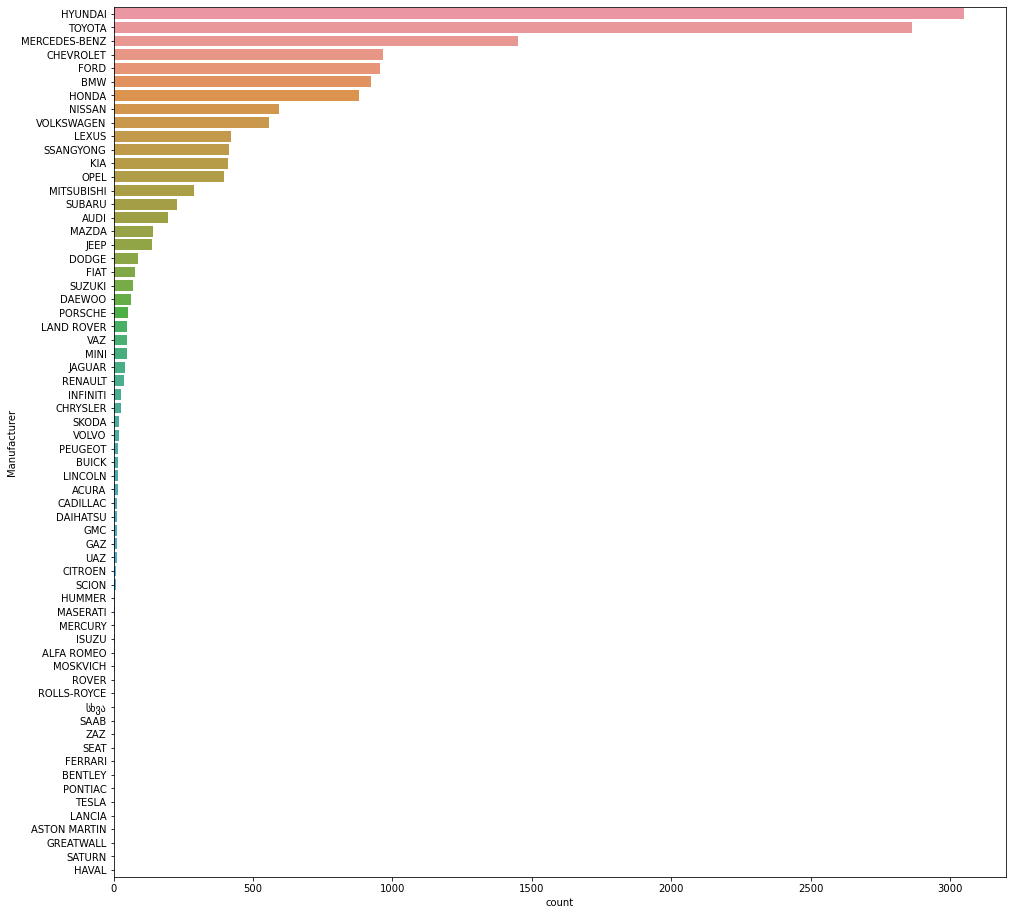

In [141]:
plt.figure(figsize=(16,16))
sns.countplot(y = df['Manufacturer'],order=df['Manufacturer'].value_counts().sort_values(ascending=False).index)

<AxesSubplot:xlabel='count', ylabel='Prod. year'>

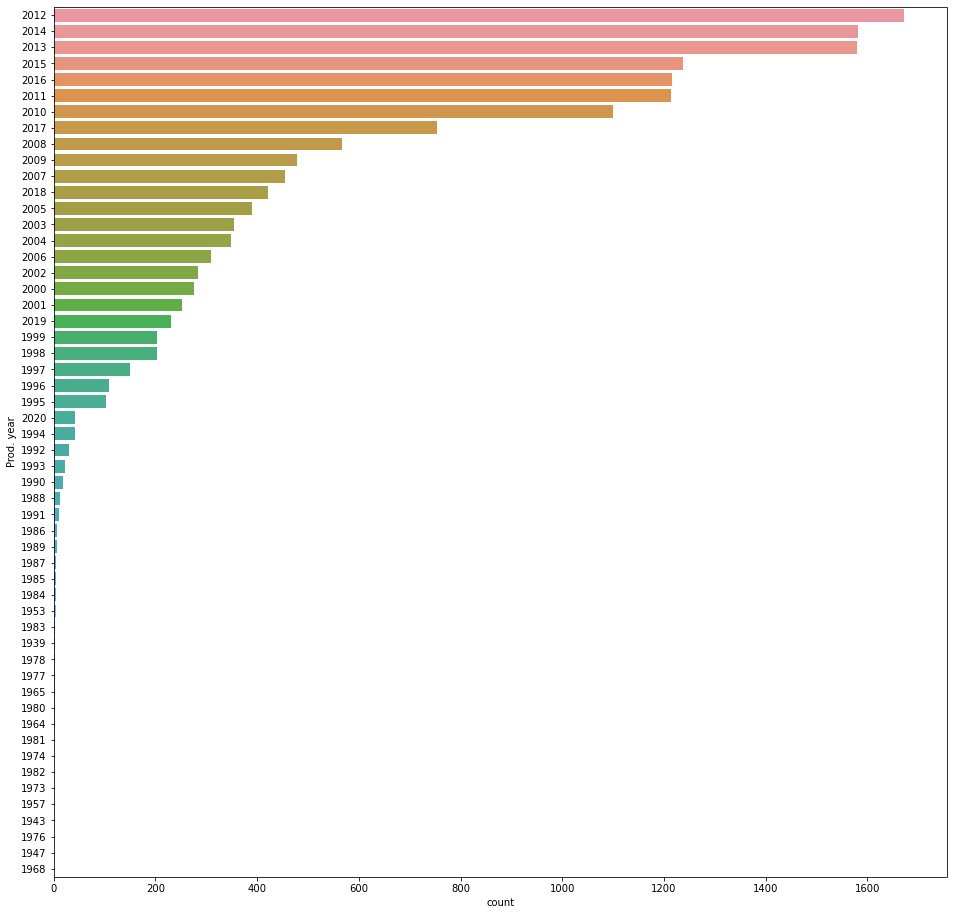

In [144]:
plt.figure(figsize=(16,16))
sns.countplot(y = df['Prod. year'],order=df['Prod. year'].value_counts().sort_values(ascending=False).index)

<AxesSubplot:xlabel='count', ylabel='Category'>

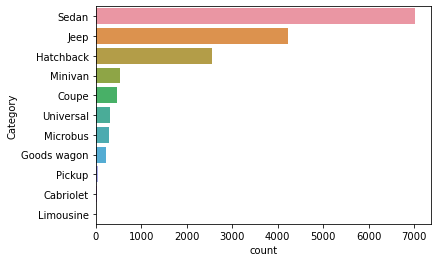

In [146]:
#plt.figure(figsize=(16,16))
sns.countplot(y = df['Category'],order=df['Category'].value_counts().sort_values(ascending=False).index)

<AxesSubplot:xlabel='Doors', ylabel='count'>

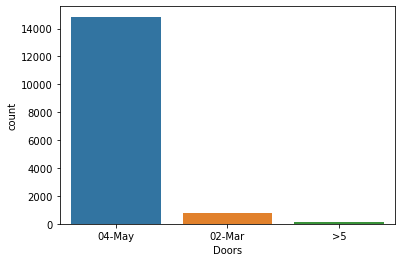

In [25]:
sns.countplot(df['Doors'])

<AxesSubplot:xlabel='Wheel', ylabel='count'>

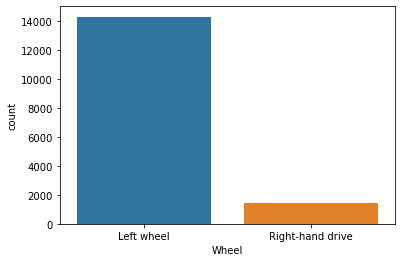

In [24]:
sns.countplot(df['Wheel'])

<AxesSubplot:xlabel='Airbags', ylabel='count'>

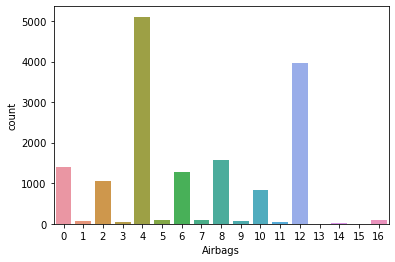

In [35]:
sns.countplot(df['Airbags'])

<AxesSubplot:xlabel='Fuel type', ylabel='count'>

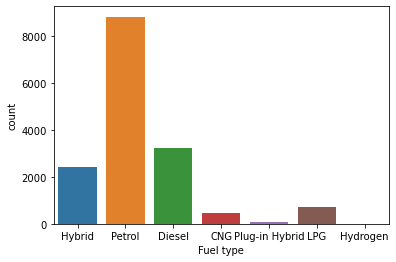

In [34]:
sns.countplot(df['Fuel type'])

In [105]:
for i in df.select_dtypes('object').columns:
    print(i,df[i].nunique())

Manufacturer 64
Model 1588
Category 11
Leather interior 2
Fuel type 7
Gear box type 4
Drive wheels 3
Doors 3
Wheel 2
Color 16


### Multivariate 

In [27]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
ID,,,,,,,,,,,,,,,,,,
45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.500000,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0
44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.000000,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0
45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.299805,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0
45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.500000,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,0
45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.299805,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0


#### Manufacturer

<AxesSubplot:xlabel='Price', ylabel='Manufacturer'>

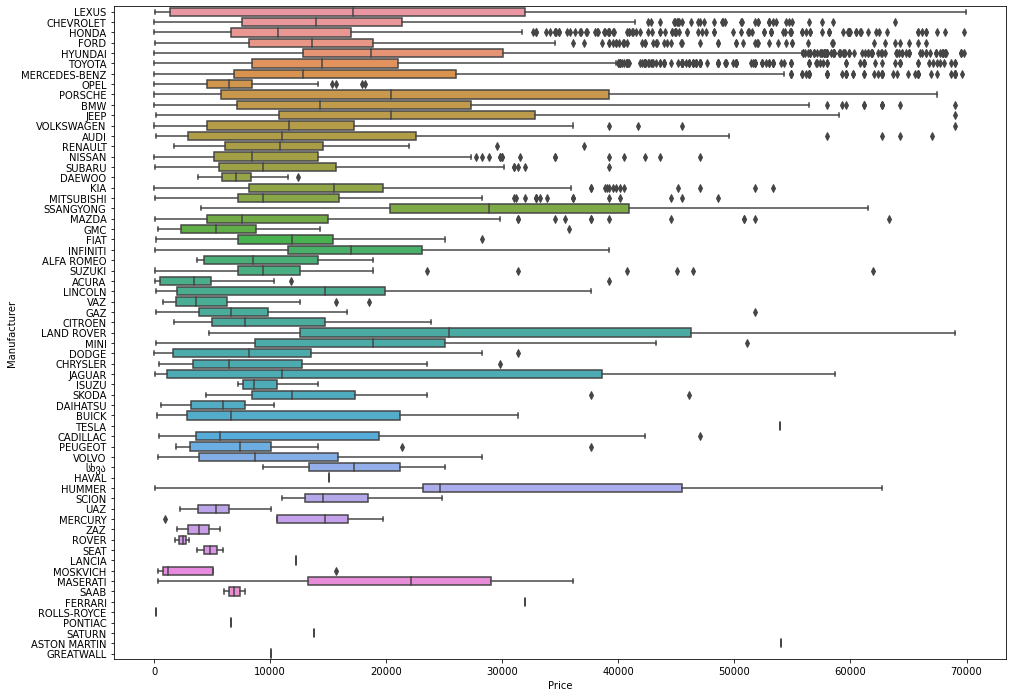

In [118]:
plt.figure(figsize=(16,12))
sns.boxplot(y = df['Manufacturer'],x=df['Price'])

#### Production Year

In [12]:
df = df[df['Prod. year']>1984]

<AxesSubplot:xlabel='Prod. year', ylabel='Price'>

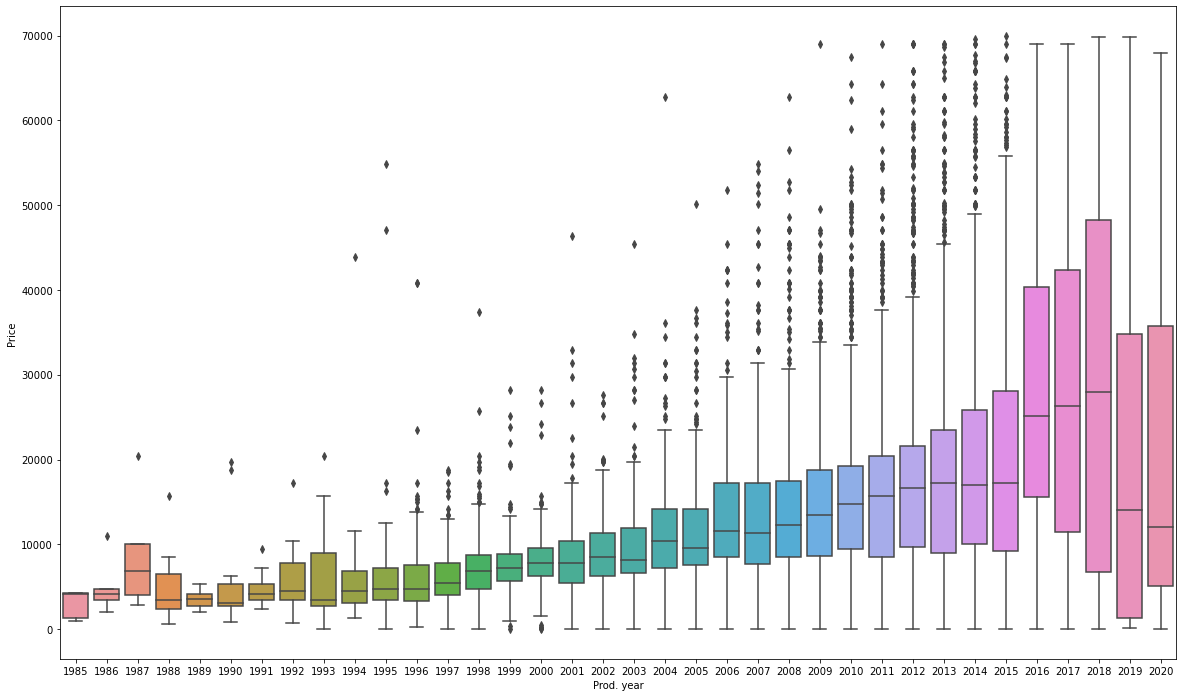

In [120]:
plt.figure(figsize=(20,12))
sns.boxplot(x = df['Prod. year'],y=df['Price'])

In [13]:
df.drop(index=df[(df['Prod. year']<1993)& (df['Price']>10500)].index,inplace=True)
df.drop(index=df[(df['Prod. year']<1998)& (df['Price']>20000)].index,inplace=True)
df.drop(index=df[(df['Prod. year']<2006)& (df['Price']>39000)].index,inplace=True)
df.drop(index=df[(df['Prod. year']<2010)& (df['Price']>50000)].index,inplace=True)
df.drop(index=df[(df['Prod. year']<2013)& (df['Price']>75000)].index,inplace=True)
df.drop(index=df[(df['Prod. year']<2015)& (df['Price']>120000)].index,inplace=True)
df.drop(index=df[df['Price']>150000].index,inplace=True)

<AxesSubplot:xlabel='Prod. year', ylabel='Price'>

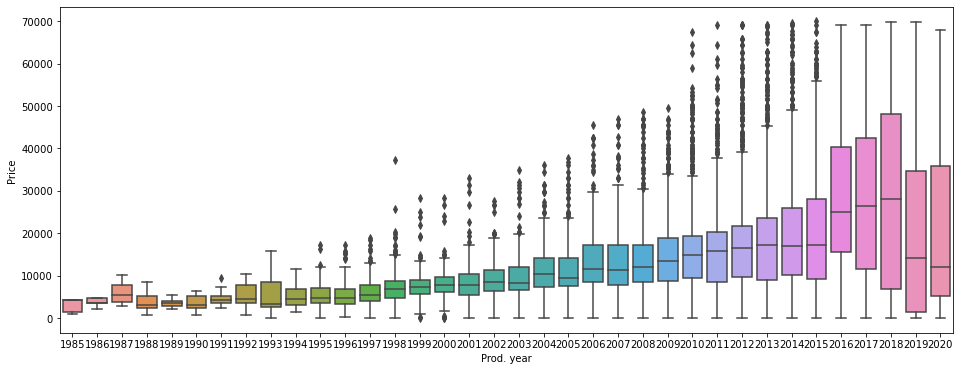

In [122]:
plt.figure(figsize=(16,6))
sns.boxplot(x = df['Prod. year'],y=df['Price'])

#### Category

<AxesSubplot:xlabel='Category', ylabel='Price'>

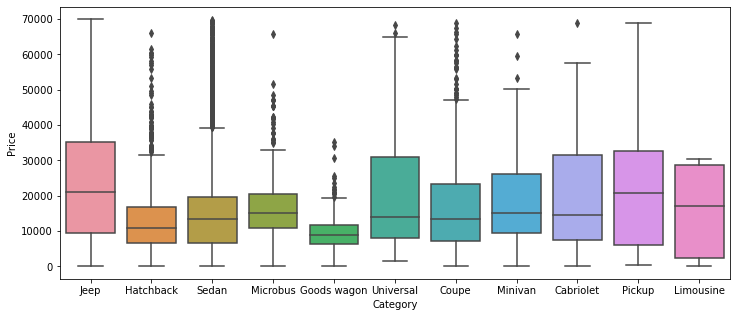

In [123]:
plt.figure(figsize=(12,5))
sns.boxplot(x = df['Category'],y=df['Price'])

In [14]:
df.drop(index=df[(df['Category']=='Hatchback')&(df['Price']>62000)].index,inplace=True)
df.drop(index=df[(df['Category']=='Jeep')&(df['Price']>142000)].index,inplace=True)
df.drop(index=df[(df['Category']=='Sedan')&(df['Price']>120000)].index,inplace=True)
df.drop(index=df[(df['Category']=='Microbus')&(df['Price']>60000)].index,inplace=True)
df.drop(index=df[(df['Category']=='Universal')&(df['Price']>72000)].index,inplace=True)
df.drop(index=df[(df['Category']=='Coupe')&(df['Price']>90000)].index,inplace=True)
df.drop(index=df[(df['Category']=='Pickup')&(df['Price']>70000)].index,inplace=True)
df.drop(index=df[(df['Category']=='Cabriolet')&(df['Price']>65000)].index,inplace=True)

<AxesSubplot:xlabel='Category', ylabel='Price'>

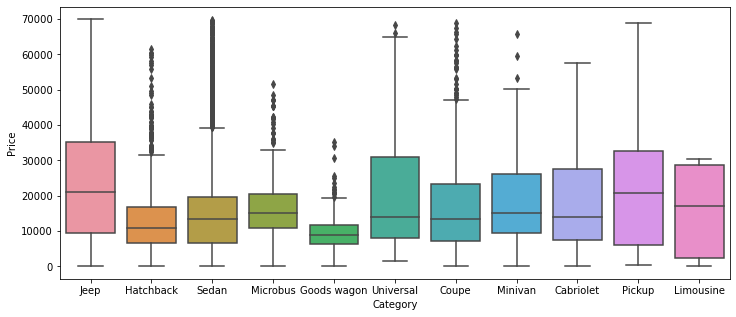

In [125]:
plt.figure(figsize=(12,5))
sns.boxplot(x = df['Category'],y=df['Price'])

<AxesSubplot:xlabel='Leather interior', ylabel='Price'>

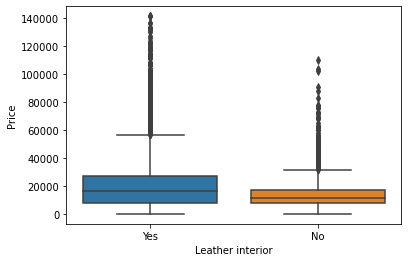

In [31]:
sns.boxplot(x=df['Leather interior'],y=df['Price'])

<AxesSubplot:xlabel='Fuel type', ylabel='Price'>

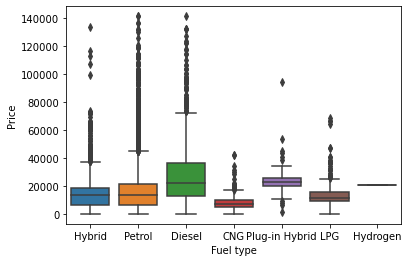

In [32]:
sns.boxplot(x=df['Fuel type'],y=df['Price'])

In [15]:
df.drop(index=df[(df['Fuel type']=='Hybrid')& (df['Price']>80000)].index,inplace=True)
df.drop(index=df[(df['Fuel type']=='Plug-in Hybrid')& (df['Price']>60000)].index,inplace=True)
df.drop(index=df[(df['Fuel type']=='Hydrogen')].index,inplace=True)

<AxesSubplot:xlabel='Gear box type', ylabel='Price'>

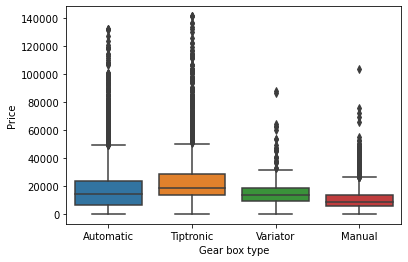

In [33]:
sns.boxplot(x=df['Gear box type'],y=df['Price'])

In [16]:
df.drop(index=df[(df['Gear box type']=='Variator')& (df['Price']>70000)].index,inplace=True)
df.drop(index=df[(df['Gear box type']=='Manual')& (df['Price']>80000)].index,inplace=True)

<AxesSubplot:xlabel='Drive wheels', ylabel='Price'>

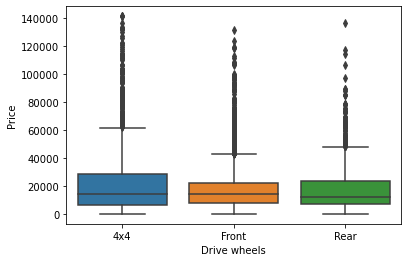

In [34]:
sns.boxplot(x=df['Drive wheels'],y=df['Price'])

<AxesSubplot:xlabel='Doors', ylabel='Price'>

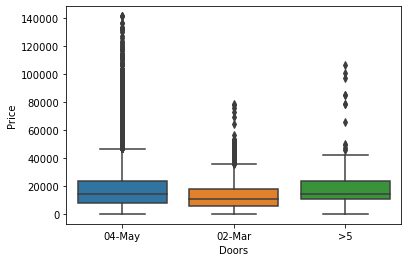

In [35]:
sns.boxplot(x=df['Doors'],y=df['Price'])

In [17]:
df.drop(index=df[(df['Doors']=='>5')& (df['Price']>85000)].index,inplace=True)

<AxesSubplot:xlabel='Wheel', ylabel='Price'>

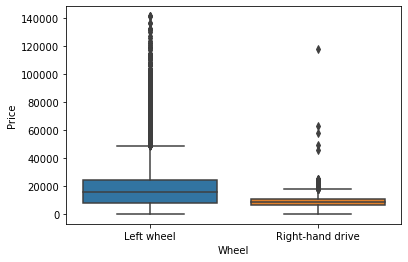

In [156]:
sns.boxplot(x=df['Wheel'],y=df['Price'])

In [18]:
df.drop(index=df[(df['Wheel']=='Right-hand drive')& (df['Price']>40000)].index,inplace=True)

<AxesSubplot:xlabel='Color', ylabel='Price'>

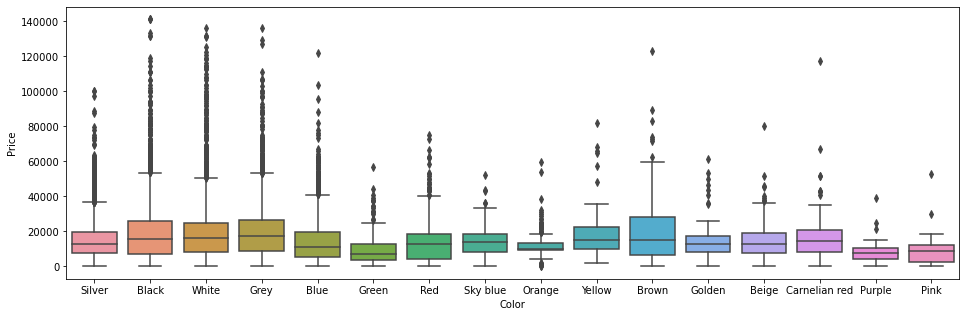

In [21]:
plt.figure(figsize=(16,5))
sns.boxplot(x=df['Color'],y=df['Price'])

##### Airbags

<AxesSubplot:xlabel='Airbags', ylabel='Price'>

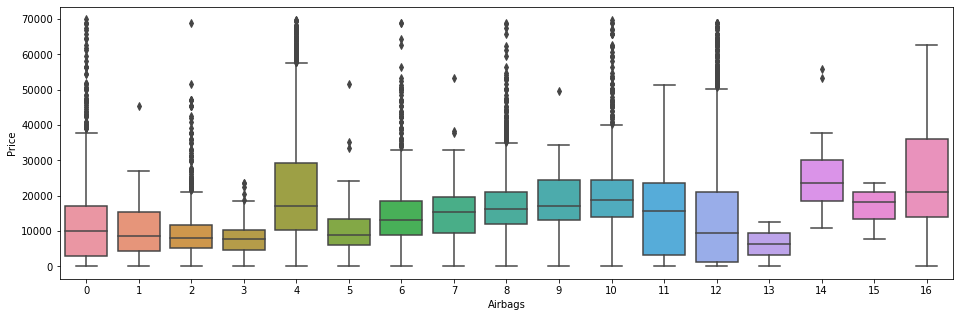

In [201]:
plt.figure(figsize=(16,5))
sns.boxplot(x=df['Airbags'],y=df['Price'])

In [19]:
#df.drop(index=df[(df['Wheel']=='Right-hand drive')& (df['Price']>40000)].index,inplace=True)
df.drop(index=df[((df['Airbags']==0)|(df['Airbags']==2)|(df['Airbags']==6)|(df['Airbags']==8)|(df['Airbags']==10)) & (df['Price']>60000)].index,inplace=True)
df.drop(index=df[(df['Airbags']==1)& (df['Price']>40000)].index,inplace=True)
df.drop(index=df[(df['Airbags']==5)& (df['Price']>30000)].index,inplace=True)
df.drop(index=df[(df['Airbags']==7)& (df['Price']>35000)].index,inplace=True)
df.drop(index=df[(df['Airbags']==9)& (df['Price']>40000)].index,inplace=True)
df.drop(index=df[(df['Airbags']==14)& (df['Price']>40000)].index,inplace=True)

<AxesSubplot:xlabel='Airbags', ylabel='Price'>

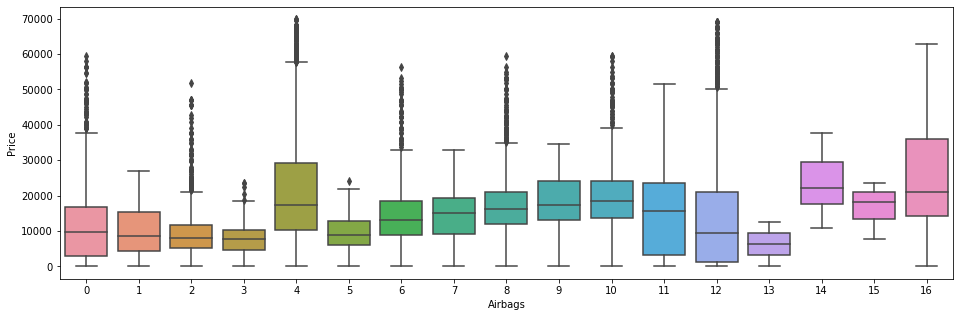

In [221]:
plt.figure(figsize=(16,5))
sns.boxplot(x=df['Airbags'],y=df['Price'])

##### Engine volume

<AxesSubplot:xlabel='Engine volume', ylabel='Price'>

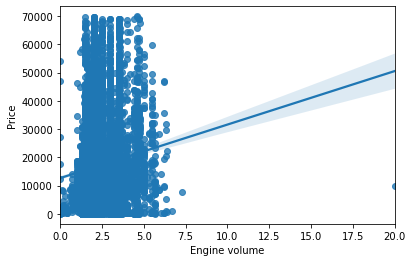

In [130]:
sns.regplot(df['Engine volume'],df['Price'])

In [20]:
df = df[df['Engine volume']<7]

<AxesSubplot:xlabel='Engine volume', ylabel='Price'>

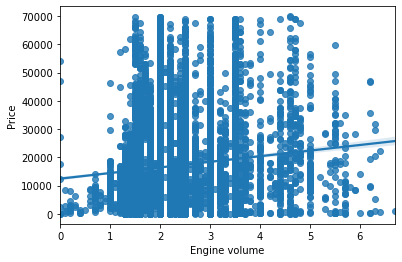

In [132]:
sns.regplot(df['Engine volume'],df['Price'])

#### Adding New Feature

In [21]:
new= []
for mil in df['Mileage']:
    if mil==0:
        new.append(1)
    else:
        new.append(0)
df['New_Car'] = new

##### Mileage

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

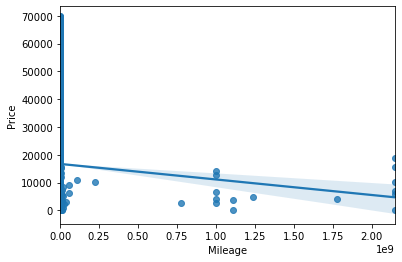

In [230]:
sns.regplot(df['Mileage'],df['Price'])

In [231]:
df['Mileage'].value_counts().sort_values(ascending=False).head()

0         589
200000    178
150000    153
160000    118
180000    112
Name: Mileage, dtype: int64

In [22]:
df.drop(columns='Mileage',inplace=True)  #Droping Mileage

#### Cropping Price

<AxesSubplot:xlabel='Price', ylabel='Count'>

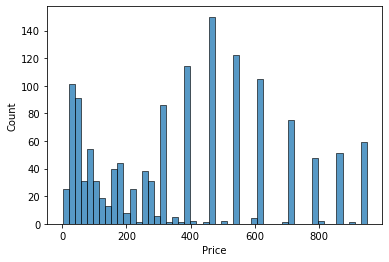

In [144]:
sns.histplot(df[df['Price']<1000]['Price'],bins=50)

In [23]:
df = df[df['Price']>1000]

#### Fixing Levy

<AxesSubplot:xlabel='Levy', ylabel='Density'>

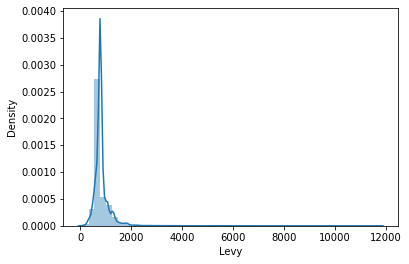

In [149]:
sns.distplot(df['Levy'])

In [24]:
de = df.copy()
de['Levy'] = de['Levy']/1000
levymax = (de['Levy'].median()+ 3*de['Levy'].std())*1000
levy=[]
for l in df['Levy']:
    if l>levymax:
        levy.append(levymax)
    else:
        levy.append(l)
df.drop(columns='Levy',inplace=True)
df['Levy'] = levy

<AxesSubplot:xlabel='Levy', ylabel='Density'>

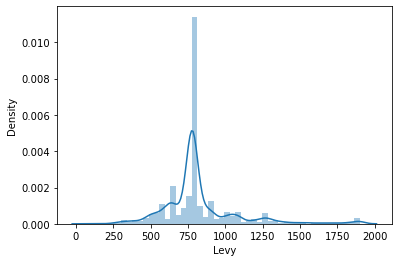

In [180]:
sns.distplot(df['Levy'])

In [235]:
df.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,New_Car,Levy
ID,,,,,,,,,,,,,,,,,,
45654403,13328,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.500000,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,0,0,1399.0
44731507,16621,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.000000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0,0,1018.0
45774419,8467,HONDA,FIT,2006,Hatchback,No,Petrol,1.299805,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0,0,779.0
45769185,3607,FORD,Escape,2011,Jeep,Yes,Hybrid,2.500000,4.0,Automatic,4x4,04-May,Left wheel,White,0,0,0,862.0
45809263,11726,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.299805,4.0,Automatic,Front,04-May,Left wheel,Silver,4,0,0,446.0


In [28]:
categ_variables = ["Model", "Color", "Manufacturer", "Category", "Fuel type", "Gear box type", "Drive wheels", "Doors", "Wheel"]
one_hot_categ = ["Category", "Fuel type", "Gear box type", "Drive wheels", "Doors", "Wheel","Leather interior"]
target_categ = ["Model","Color","Manufacturer"]


## Target encoding

In [29]:
def Target_Encoding(df1,cols):
    tar_dict={}
    for col in cols:
        a = df1.groupby(col)["Price"].median().reset_index()
        df1 = df1.merge(a,on=col,how='left')
        df1.drop(columns=col,inplace=True)
        df1.rename(columns={'Price_x':'Price','Price_y':'encoded_'+col},inplace=True)
        tar_dict[col]=a
    return df1, tar_dict

In [30]:
df, tar_enc_dict = Target_Encoding(df,target_categ)

## One Hot Encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,drop='if_binary',handle_unknown='ignore',dtype='int32')
o = pd.DataFrame(data = ohe.fit_transform(df[one_hot_categ]),index=df.index,columns=ohe.get_feature_names())
df = pd.concat((df,o),axis=1)
df.drop(columns=one_hot_categ,inplace=True)
df.head()

,Price,Prod. year,Engine volume,Cylinders,Airbags,Turbo,New_Car,Levy,encoded_Model,encoded_Color,encoded_Manufacturer,x0_Cabriolet,x0_Coupe,x0_Goods wagon,x0_Hatchback,x0_Jeep,x0_Limousine,x0_Microbus,x0_Minivan,x0_Pickup,x0_Sedan,x0_Universal,x1_CNG,x1_Diesel,x1_Hybrid,x1_LPG,x1_Petrol,x1_Plug-in Hybrid,x2_Automatic,x2_Manual,x2_Tiptronic,x2_Variator,x3_4x4,x3_Front,x3_Rear,x4_02-Mar,x4_04-May,x4_>5,x5_Right-hand drive,x6_Yes
0,13328,2010,3.500000,6.0,12,0,0,1399.0,14504.5,13799.0,23521.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
1,16621,2011,3.000000,6.0,8,0,0,1018.0,3293.0,16935.0,14740.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
2,8467,2006,1.299805,4.0,2,0,0,779.0,11290.0,16935.0,11917.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0
3,3607,2011,2.500000,4.0,0,0,0,862.0,16072.5,17249.0,14426.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
4,11726,2014,1.299805,4.0,4,0,0,446.0,11290.0,13799.0,11917.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1


### Feature Importance

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
X = df.drop(columns='Price')
y = df['Price']
etr.fit(X,y)

ExtraTreesRegressor()

<AxesSubplot:>

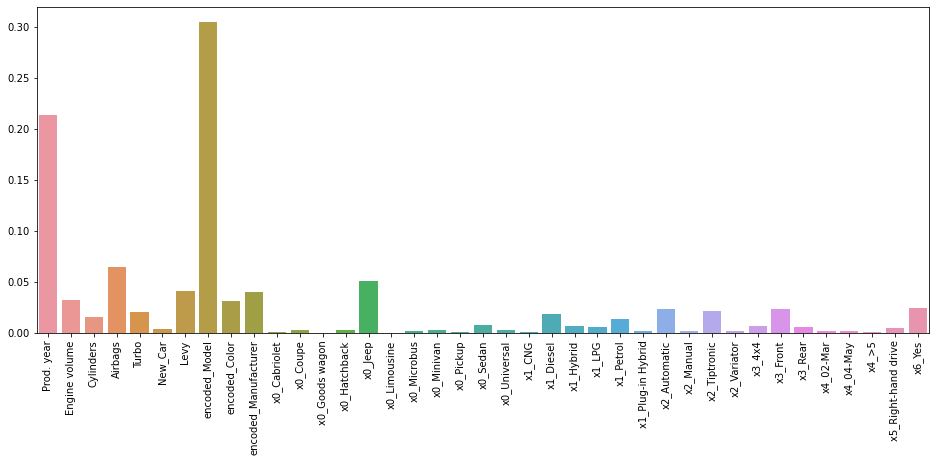

In [249]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.
sns.barplot(x=X.columns,y=etr.feature_importances_)

In [33]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, BayesianRidge
from sklearn.metrics import mean_squared_log_error, r2_score
from xgboost import XGBRegressor, XGBRFRegressor

In [34]:
lasso = Lasso()
rf = RandomForestRegressor()
xgb = XGBRegressor()
xgbrf = XGBRFRegressor()

In [35]:
X = df.drop(columns='Price')
Y = np.array(df['Price'])
Y = Y.reshape((-1,1))

In [36]:
# StandardScaler +RF

ss1 = StandardScaler()
ss2 = StandardScaler()
x = ss1.fit_transform(X)
y = ss2.fit_transform(Y)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=42)

rf.fit(xtrain,ytrain)
train_pred = np.array(rf.predict(xtrain))
train_pred = train_pred.reshape((-1,1))
ypred = np.array(rf.predict(xtest))
ypred = ypred.reshape((-1,1))

ytrain = ss2.inverse_transform(ytrain)
ytest = ss2.inverse_transform(ytest)
ypred = ss2.inverse_transform(ypred)
train_pred = ss2.inverse_transform(train_pred)

print("Train set error: ", np.sqrt(mean_squared_log_error(ytrain,train_pred)))
print("Test set error: ", np.sqrt(mean_squared_log_error(ytest,ypred)))
print("Train R2: ", r2_score(ytrain,train_pred))
print("Test R2: ", r2_score(ytest,ypred))


Train set error:  0.26196445807481944
Test set error:  0.4330709485562565
Train R2:  0.9433027861280207
Test R2:  0.8042665693348842


### Trying MinMax Scaler

In [37]:
# MinMaxScaler + RF

mms1 = MinMaxScaler()
mms2 = MinMaxScaler()
x = mms1.fit_transform(X)
y = mms2.fit_transform(Y)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=42)

rf.fit(xtrain,ytrain)
train_pred = np.array(rf.predict(xtrain))
train_pred = train_pred.reshape((-1,1))
ypred = np.array(rf.predict(xtest))
ypred = ypred.reshape((-1,1))

ytrain = mms2.inverse_transform(ytrain)
ytest = mms2.inverse_transform(ytest)
ypred = mms2.inverse_transform(ypred)
train_pred = mms2.inverse_transform(train_pred)

print("Train set error: ", np.sqrt(mean_squared_log_error(ytrain,train_pred)))
print("Test set error: ", np.sqrt(mean_squared_log_error(ytest,ypred)))
print("Train R2: ", r2_score(ytrain,train_pred))
print("Test R2: ", r2_score(ytest,ypred))


Train set error:  0.2627029809390798
Test set error:  0.43645093655252615
Train R2:  0.9429309003038713
Test R2:  0.8015490782236381


### Trying Robust Scaler

In [38]:
#Robust Scaler + RF

rs1 = RobustScaler()
rs2 = RobustScaler()
x = rs1.fit_transform(X)
y = rs2.fit_transform(Y)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=42)

rf.fit(xtrain,ytrain)
train_pred = np.array(rf.predict(xtrain))
train_pred = train_pred.reshape((-1,1))
ypred = np.array(rf.predict(xtest))
ypred = ypred.reshape((-1,1))

ytrain = rs2.inverse_transform(ytrain)
ytest = rs2.inverse_transform(ytest)
ypred = rs2.inverse_transform(ypred)
train_pred = rs2.inverse_transform(train_pred)

print("Train set error: ", np.sqrt(mean_squared_log_error(ytrain,train_pred)))
print("Test set error: ", np.sqrt(mean_squared_log_error(ytest,ypred)))
print("Train R2: ", r2_score(ytrain,train_pred))
print("Test R2: ", r2_score(ytest,ypred))


Train set error:  0.26139807505338725
Test set error:  0.4331745316850504
Train R2:  0.9433550726430926
Test R2:  0.8042865729174197


In [39]:
#StandardScaler + XGBRF
ss1 = StandardScaler()
ss2 = StandardScaler()
x = ss1.fit_transform(X)
y = ss2.fit_transform(Y)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=42)

xgbrf.fit(xtrain,ytrain)
train_pred = np.array(xgbrf.predict(xtrain))
train_pred = train_pred.reshape((-1,1))
ypred = np.array(xgbrf.predict(xtest))
ypred = ypred.reshape((-1,1))

ytrain = ss2.inverse_transform(ytrain)
ytest = ss2.inverse_transform(ytest)
ypred = ss2.inverse_transform(ypred)
train_pred = ss2.inverse_transform(train_pred)

print("Train set error: ", np.sqrt(mean_squared_log_error(ytrain,train_pred)))
print("Test set error: ", np.sqrt(mean_squared_log_error(ytest,ypred)))
print("Train R2: ", r2_score(ytrain,train_pred))
print("Test R2: ", r2_score(ytest,ypred))


Train set error:  0.5626624238531103
Test set error:  0.5722012724867618
Train R2:  0.6761558067943498
Test R2:  0.6749427116353028


###### Random Forest with Standard Scaler is giving the best results

### Hyperparameter Tuning

In [40]:
n_est = [x for x in range(100,1200,100)]
max_feat = ['sqrt']
min_sample_split=[2,5,10,20,50]
min_sample_leaf=[1,2,5,10,20]
max_depth = [x for x in range(5,20,2)]

In [41]:
random_grid = {'n_estimators': n_est,
                'max_depth': max_depth,
                'max_features': max_feat,
                'min_samples_split': min_sample_split,
                'min_samples_leaf': min_sample_leaf}

In [47]:
model = RandomizedSearchCV(rf,param_distributions=random_grid,n_iter=150,scoring='neg_mean_squared_log_error',verbose=2,cv=5)

In [48]:
model.fit(xtrain,ytrain)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=900; total time=   7.9s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=900; total time=   8.4s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=900; total time=   7.9s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=900; total time=   8.2s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=900; total time=   7.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1100; total time=  14.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=1100; total time=  12.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimat

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=600; total time=   6.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=600; total time=   6.3s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=900; total time=   7.3s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=900; total time=   7.2s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=900; total time=   7.2s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=900; total time=   7.2s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=900; total time=   7.2s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=400; total time=   3.7s
[CV] END max_depth=17, max_features=

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   6.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=600; total time=   6.2s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=900; total time=   7.3s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=900; total time=   7.2s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=900; total time=   7.4s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=900; total time=   7.2s
[CV] END max_depth=7, max_featur

[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=800; total time=   7.0s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.1s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.1s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.1s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.1s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.1s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=200; total time=   1.7s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=50, n_estimators=200; total time=   1.7s
[CV] END max_depth=9, max_features=sqrt,

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=19, max_features

[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1000; total time=   5.7s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1000; total time=   5.5s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1000; total time=   5.4s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1000; total time=   5.6s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1000; total time=   5.5s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=   2.5s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=   2.5s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=500; total time=   2.5s
[CV] END max_depth=17, m

[CV] END max_depth=19, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=700; total time=   3.2s
[CV] END max_depth=19, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=700; total time=   3.2s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   3.6s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   3.5s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   3.5s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   3.6s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=900; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=50, n_estimators=800; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt

[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   5.2s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.8s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.8s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.8s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.7s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.7s
[CV] END max_depth=9, max_feat

[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   2.0s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   2.0s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   2.0s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   2.0s
[CV] END max_depth=17, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   1.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=5, max_featur

[CV] END max_depth=19, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=500; total time=   2.4s
[CV] END max_depth=19, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=500; total time=   2.3s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=1000; total time=   3.9s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=1000; total time=   3.8s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=1000; total time=   3.8s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=1000; total time=   3.8s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=1000; total time=   3.9s
[CV] END max_depth=19, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1100; total time=   7.9s
[CV] END max_depth=19, max_

[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   4.3s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   4.3s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   4.2s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   3.9s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   5.4s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   5.3s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   5.3s
[CV] END max_depth=13, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=   5.3s
[CV] END max_depth=13, max_f

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=50, n_estimators=100; total time=   0.4s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=150,
                   param_distributions={'max_depth': [5, 7, 9, 11, 13, 15, 17,
                                                      19],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 20, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100]},
                   scoring='neg_mean_squared_log_error', verbose=2)

In [49]:
model.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 19}

In [51]:
f_model = RandomForestRegressor(n_estimators= 700,min_samples_split= 2,min_samples_leaf= 1,
                                max_features= 'sqrt',max_depth= 19)
f_model.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=19, max_features='sqrt', n_estimators=700)

### Preparing Test Set

In [118]:
test = pd.read_csv('test.csv')
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [119]:
Engvol(test)

test.index=test['ID']
test.drop(columns='ID',inplace=True)
test.drop(columns='Price',inplace=True)

test['Levy'] = test['Levy'].replace('-',np.nan)
test['Levy'] = test['Levy'].astype('float16')


test['Mileage'] = [i[0:-3] for i in test['Mileage']]
test['Mileage'] = test['Mileage'].astype('int64')

test['Levy'] = test['Levy'].replace(np.nan,Levy_median)

new= []
for mil in test['Mileage']:
    if mil==0:
        new.append(1)
    else:
        new.append(0)
test['New_Car'] = new
test.drop(columns='Mileage',inplace=True)


levy=[]
for l in test['Levy']:
    if l>levymax:
        levy.append(levymax)
    else:
        levy.append(l)
test.drop(columns='Levy',inplace=True)
test['Levy'] = levy

In [121]:
for col in target_categ:
    test = test.merge(tar_enc_dict[col],how='left',on=col)
    test.drop(columns=col,inplace=True)
    test.rename(columns={'Price':'encoded_'+col},inplace=True)

,Prod. year,Category,Leather interior,Fuel type,Engine volume,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags,Turbo,New_Car,Levy,encoded_Model,encoded_Color,encoded_Manufacturer
0,2012,Hatchback,No,Diesel,2.000000,4,Manual,Front,02-Mar,Left wheel,10,1,1,779.0,4704.0,18189.0,12544.0
1,2012,Sedan,Yes,Petrol,2.400391,4,Tiptronic,Front,04-May,Left wheel,10,0,0,779.0,13842.5,18189.0,19130.0
2,2005,Sedan,No,Petrol,1.500000,4,Automatic,Front,04-May,Right-hand drive,8,0,0,779.0,8467.0,13956.0,9095.0
3,2012,Jeep,Yes,Petrol,3.199219,6,Automatic,4x4,04-May,Left wheel,12,0,0,975.0,15056.0,11917.0,9100.0
4,1993,Hatchback,No,Petrol,1.599609,4,Manual,Front,04-May,Left wheel,0,0,0,779.0,6586.0,16935.0,6586.0


In [122]:
te = pd.DataFrame(data = ohe.transform(test[one_hot_categ]),index=test.index,columns=ohe.get_feature_names())
test = pd.concat((test,te),axis=1)
test.drop(columns=one_hot_categ,inplace=True)

,Prod. year,Engine volume,Cylinders,Airbags,Turbo,New_Car,Levy,encoded_Model,encoded_Color,encoded_Manufacturer,x0_Cabriolet,x0_Coupe,x0_Goods wagon,x0_Hatchback,x0_Jeep,x0_Limousine,x0_Microbus,x0_Minivan,x0_Pickup,x0_Sedan,x0_Universal,x1_CNG,x1_Diesel,x1_Hybrid,x1_LPG,x1_Petrol,x1_Plug-in Hybrid,x2_Automatic,x2_Manual,x2_Tiptronic,x2_Variator,x3_4x4,x3_Front,x3_Rear,x4_02-Mar,x4_04-May,x4_>5,x5_Right-hand drive,x6_Yes
0,2012,2.000000,4,10,1,1,779.0,4704.0,18189.0,12544.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,2012,2.400391,4,10,0,0,779.0,13842.5,18189.0,19130.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
2,2005,1.500000,4,8,0,0,779.0,8467.0,13956.0,9095.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
3,2012,3.199219,6,12,0,0,975.0,15056.0,11917.0,9100.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
4,1993,1.599609,4,0,0,0,779.0,6586.0,16935.0,6586.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0


In [123]:
test.isna().sum()

Prod. year                0
Engine volume             0
Cylinders                 0
Airbags                   0
Turbo                     0
New_Car                   0
Levy                      0
encoded_Model           455
encoded_Color             0
encoded_Manufacturer      6
x0_Cabriolet              0
x0_Coupe                  0
x0_Goods wagon            0
x0_Hatchback              0
x0_Jeep                   0
x0_Limousine              0
x0_Microbus               0
x0_Minivan                0
x0_Pickup                 0
x0_Sedan                  0
x0_Universal              0
x1_CNG                    0
x1_Diesel                 0
x1_Hybrid                 0
x1_LPG                    0
x1_Petrol                 0
x1_Plug-in Hybrid         0
x2_Automatic              0
x2_Manual                 0
x2_Tiptronic              0
x2_Variator               0
x3_4x4                    0
x3_Front                  0
x3_Rear                   0
x4_02-Mar                 0
x4_04-May           

In [124]:
model_med = tar_enc_dict['Model']['Price'].median()
manu_med = tar_enc_dict['Manufacturer']['Price'].median()
test['encoded_Model'] = test['encoded_Model'].fillna(model_med)
test['encoded_Manufacturer'] = test['encoded_Manufacturer'].fillna(manu_med)

In [126]:
test.head()

,Prod. year,Engine volume,Cylinders,Airbags,Turbo,New_Car,Levy,encoded_Model,encoded_Color,encoded_Manufacturer,x0_Cabriolet,x0_Coupe,x0_Goods wagon,x0_Hatchback,x0_Jeep,x0_Limousine,x0_Microbus,x0_Minivan,x0_Pickup,x0_Sedan,x0_Universal,x1_CNG,x1_Diesel,x1_Hybrid,x1_LPG,x1_Petrol,x1_Plug-in Hybrid,x2_Automatic,x2_Manual,x2_Tiptronic,x2_Variator,x3_4x4,x3_Front,x3_Rear,x4_02-Mar,x4_04-May,x4_>5,x5_Right-hand drive,x6_Yes
0,2012,2.000000,4,10,1,1,779.0,4704.0,18189.0,12544.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,2012,2.400391,4,10,0,0,779.0,13842.5,18189.0,19130.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
2,2005,1.500000,4,8,0,0,779.0,8467.0,13956.0,9095.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
3,2012,3.199219,6,12,0,0,975.0,15056.0,11917.0,9100.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1
4,1993,1.599609,4,0,0,0,779.0,6586.0,16935.0,6586.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0


In [135]:
x_test = ss1.transform(test)
y_test = f_model.predict(x_test)

In [136]:
y_test = y_test.reshape((-1,1))
y_test = pd.DataFrame(y_test)
y_test.head()

,0
0,14930.298162
1,17999.895868
2,8132.359587
3,12883.191199
4,4787.603994


In [137]:
y_test.to_csv("submission.csv",header='Price',index=False)